In [34]:
# Customer Retention & Churn Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Step 1: Load File

# For ZIP CSV file:
zip_path = r'C:\Users\User\task 2\data\WA_Fn-UseC_-Telco-Customer-Churn.zip'
df = pd.read_csv(zip_path, compression='zip')

In [36]:
# Step 2: Clean Column Names

df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print("Columns after cleaning:")
print(df.columns)

Columns after cleaning:
Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [37]:
# Step 3: Detect Key Columns

# Churn
if 'churn' not in df.columns:
    raise ValueError("Churn column not found!")

# Tenure
if 'tenure' not in df.columns:
    raise ValueError("Tenure column not found!")

# Detect a date column for cohort analysis
date_cols = [col for col in df.columns if 'date' in col]
cohort_enabled = False
if date_cols:
    signup_col = date_cols[0]
    cohort_enabled = True

In [38]:
# Step 4: Clean & Prepare Data

df = df.drop_duplicates()
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['churn_flag'] = df['churn'].map({'Yes':1, 'No':0})

# Fill numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [39]:
# Step 5: Overall Metrics

overall_metrics = pd.DataFrame({
    'Metric': ['Total Customers', 'Total Churned', 'Overall Churn Rate (%)', 'Overall Retention Rate (%)'],
    'Value': [
        df.shape[0],
        df['churn_flag'].sum(),
        round(df['churn_flag'].mean()*100, 2),
        round(100 - df['churn_flag'].mean()*100, 2)
    ]
})
print("\nOverall Metrics:")
print(overall_metrics)


Overall Metrics:
                       Metric    Value
0             Total Customers  7043.00
1               Total Churned  1869.00
2      Overall Churn Rate (%)    26.54
3  Overall Retention Rate (%)    73.46


In [40]:
# Step 6: Churn by Key Segments

if 'contract' in df.columns:
    contract_churn = df.groupby('contract')['churn_flag'].mean() * 100
    print("\nChurn Rate by Contract Type:")
    print(contract_churn)

if 'paymentmethod' in df.columns:
    payment_churn = df.groupby('paymentmethod')['churn_flag'].mean() * 100
    print("\nChurn Rate by Payment Method:")
    print(payment_churn)



Churn Rate by Contract Type:
contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: churn_flag, dtype: float64

Churn Rate by Payment Method:
paymentmethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: churn_flag, dtype: float64


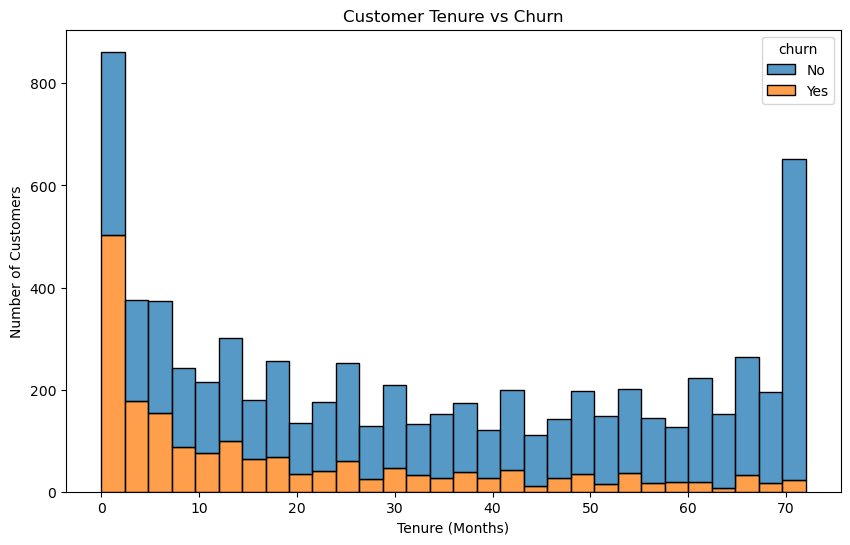

In [41]:
# Step 7: Tenure vs Churn

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30)
plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


In [42]:
# Step 9: Retention Drivers

segment_cols = []
if 'contract' in df.columns:
    segment_cols.append('contract')
if 'paymentmethod' in df.columns:
    segment_cols.append('paymentmethod')

if segment_cols:
    retention_drivers = df.groupby(segment_cols).agg(
        churn_rate=('churn_flag','mean')
    ).sort_values('churn_rate') * 100
    print("\nRetention Drivers by Segment:")
    print(retention_drivers)



Retention Drivers by Segment:
                                          churn_rate
contract       paymentmethod                        
Two year       Mailed check                 0.785340
               Credit card (automatic)      2.237522
               Bank transfer (automatic)    3.368794
One year       Mailed check                 6.824926
Two year       Electronic check             7.738095
One year       Bank transfer (automatic)    9.718670
               Credit card (automatic)     10.301508
               Electronic check            18.443804
Month-to-month Mailed check                31.578947
               Credit card (automatic)     32.780847
               Bank transfer (automatic)   34.125637
               Electronic check            53.729730


In [ ]:
#Based on the Telco customer dataset, the overall churn rate is approximately 26.5%, meaning roughly one in four customers leave the service. 
#Analysis by contract type reveals that month-to-month contracts experience the highest churn, while one-year and two-year contracts retain customers much better, indicating that incentivizing users to upgrade to longer-term plans could improve retention. 
#Payment method also plays a significant role: customers paying via electronic checks churn at a much higher rate than those using automated payments such as credit card or bank transfer, suggesting that targeted retention campaigns and incentives for high-risk payment methods could be effective.
#Tenure analysis shows that most churn occurs within the first 6 to 12 months, highlighting the importance of strong onboarding, early engagement, and proactive communication during this critical period. Further segmentation by contract and payment method identifies the highest-risk group as month-to-month customers using electronic or mailed checks, while long-term contracts with automated payments show the lowest churn. 
#These insights indicate that retention strategies should focus on early engagement, encouraging upgrades to longer contracts, and personalized interventions for high-risk segments to reduce churn and maximize customer lifetime value.